# HW 14 - Astropy
ULAB - Physics and Astronomy Division \
Due **Sunday, March 1st, 2025 at 11:59pm** on Gradescope

## 1 Unit Conversion
Import the astropy module `units` as `u` in the cell below.

In [2]:
from astropy import units as u 

Convert a speed of **60 km/h** to **m/s**. \
\
Round your answer to two significant digits. *Hint: With an f-string, you can use `:.3f`, like `print(f"{speed_mps:.3f}")`*.

In [6]:
speed = 60 * u.kilometer / u.hour
print(speed)
print(speed.to(u.meter / u.second))

60.0 km / h
16.666666666666668 m / s


## 2 Time Manipulation
Define **Julian Date** in the cell below.

In [10]:
#Julian date is a calendar system that a lot of astronomers use. It gives the date as the number of days that has passed since some starting point, and the time as a decimal.

What's the difference between the **Julian calendar** and the **Gregorian calendar**?

In [12]:
# One of the main differences is that Julian days reset at noon while Greogiran days reset at midnight.

From the astropy module `time` import `Time` in the cell below.

In [14]:
from astropy.time import Time

Find the Julian Date for **the current time**. 

In [20]:
timern = Time("2025-03-01 15:36:00")
print(timern.jd)

2460736.15


Convert `1969-07-02 20:17:00` to its **Julian Date**.

In [24]:
time1 = Time("1969-07-02 20:17:00")
print(time1.jd)

2440405.345138889


What historically happened at this date and time?

In [26]:
# The Ireland cricket team won a match? Also Jenni Rivera was born.

## 3 Coordinate Transformations
From the astropy module `coordinates` import `SkyCoord`, `Galactic`, `AltAz` and `EarthLocation` in the cell below.

In [30]:
from astropy.coordinates import SkyCoord, Galactic, AltAz, EarthLocation

Define a celestial object at **RA = 15 degrees** and **DEC = -20 degrees** in ICRS. Use the astropy `Time` module.

In [34]:
ra = 15 * u.degree
dec = -20 * u.degree
frame = 'icrs'

target_icrs = SkyCoord(ra=ra, dec=dec, frame=frame)
print(target_icrs)

<SkyCoord (ICRS): (ra, dec) in deg
    (15., -20.)>


Convert the object's coordinates from ICSRS to **Galactic**.

In [38]:
target_galactic = target_icrs.transform_to(Galactic())
print(target_galactic)

<SkyCoord (Galactic): (l, b) in deg
    (138.76123783, -82.60718782)>


Convert the object's coordinate from ICRS to **AltAz**. For AltAz frame, use the location of **Campbell Hall**.

In [42]:
lat = 37.8 * u.deg
lon = -122.2 * u.deg
height = 1 * u.meter

us = EarthLocation(lat=lat, lon=lon, height=height)
right_now = Time.now()

altaz_frame = AltAz(obstime=right_now, location=us)
target_altaz = target_icrs.transform_to(altaz_frame)
print(target_altaz)

<SkyCoord (AltAz: obstime=2025-03-01 23:52:23.705318, location=(-2688929.16324542, -4269947.04834143, 3887927.77817763) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (202.29537692, 29.15674382)>


## 4 FITS Files
From the astropy module `astropy.io` import `fits` in the cell below.

In [44]:
from astropy.io import fits

From the astropy module `astropy.utils.data` import `download_file`.

In [46]:
from astropy.utils.data import download_file

Import `numpy` in the cell below.

In [48]:
import numpy as np

Use the `download_file` astropy function to create a variable for the location of the `.fits` file from class.

In [50]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

Follow the procedure from lecture to open the `.fits` files in the cell below. Make sure to use the `hdul` format, while calling `hdul.info`, `hdul[0]` and `hdul[1]` appropriately.

In [94]:
with fits.open(image_file) as hdul:
    hdul.info()
    data = hdul[0].data
    data1 = hdul[1].data

Filename: C:\Users\joshj\.astropy\cache\download\url\ff6e0b93871033c68022ca026a956d87\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


With the `np.max` function, find the brightest pixel in the image. Print its value in the cell below.

In [104]:
print(np.max(data))

22918


With the `np.min` function, find the least brightest pixel in the image. Print its value in the cell below.

In [112]:
print(np.min(data))

3759


## Tables
From the astropy module `astropy.table` import `Table`.

In [114]:
from astropy.table import Table

Make an astropy table with **three** actual stars (so you will need to use google for this part). Include the `name`, `magnitude` and `spectral type`.

In [120]:
data = {
    'Star': ['Canopus', 'Arcturus', 'Altair'],
    'Magnitude': [-0.74, -0.05, 0.76],
    'Spectral Type': ['A9 II', 'K0 III', 'A7 V']
}
table = Table(data)
print(table)

  Star   Magnitude Spectral Type
-------- --------- -------------
 Canopus     -0.74         A9 II
Arcturus     -0.05        K0 III
  Altair      0.76          A7 V


Save the table as a `.fits` file. *Hint: Use the function `.write` with the argument `format='fits'`.*

In [128]:
star_table = Table.read('stars.fits', format='fits')

Read and print the table in the cell below from the `.fits` file you made.

In [132]:
star_table = Table.read('stars.fits', format='fits')
print(star_table)

  Star   Magnitude Spectral Type
-------- --------- -------------
 Canopus     -0.74         A9 II
Arcturus     -0.05        K0 III
  Altair      0.76          A7 V


## 6 Advanced... but awesome!
With the Hipparcos catalog, construct a Hertzsprung-Russell (H-R) diagram. Overall you will do the following:
* Download and clean the stellar data from the Hipparcos catalog.
* Calculate the absolute magnitude of the stars.
* Convert and classify spectral types.
* Plot an H-R diagram using both spectral class and color-index (B-V).

In the cell below, define what an **H-R** diagram is.

In [134]:
# It's a scatter plot of stars that shows luminosity vs. temperature, and it helps classify stars.

### 6.1 Download and Load in the Hipparcos Catalog
The catalog you are downloading contains accurate parallax measurements which will help us determine the **absolute magnitude** of stars. 
* **Absolute mangitude** = the actual brightness of a star
* **Apparent magnitude** = how bright the star appears to us on Earth

Import `pandas` in the cell below.

In [136]:
import pandas as pd

In the cell below import the file `cluster_data.csv` as a pandas dataframe. Add the following arguments:
* skiprows=44
* sep=';'
* header=None
* index_col=0
* names = ['HIP', 'Vmag', 'Plx', 'B-V', 'SpType']
* skipfooter=1
* engine='python'

In [140]:
df = pd.read_csv(
    'cluster_data.tsv',  
    skiprows=44,  
    sep=';',  
    header=None,  
    index_col=0,  
    names=['HIP', 'Vmag', 'Plx', 'B-V', 'SpType'],  
    skipfooter=1,  
    engine='python'  
)

Display the first few rows of the data.

In [142]:
print(df.head())

      Vmag      Plx     B-V SpType
HIP                               
10    8.59    10.76   0.489    F6V
11    7.34     4.29   0.081     A2
12    8.43     4.06   1.484  K4III
13    8.80     3.49   1.128  K0III
14    7.25     5.11   1.200     K0


### 6.2 Clean the Data
Some of the rows in the data contain **missing** or **invalid** values so we need to "clean" our data. We will start by replacing the **blank spaces with NaN**, run the cell below.

In [146]:
df_clean = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

C:\Users\joshj\AppData\Local\Temp\ipykernel_3556\395354793.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)


Drop the rows with missing (NaN) values. *Hint: Use the `.dropna()` function`.

In [148]:
df = df.dropna()

Run the cell below. We are converting the datatypes in the columns to floats.

In [150]:
df_clean[['Vmag', 'Plx', 'B-V']] = df_clean[['Vmag', 'Plx', 'B-V']].astype(float)

# Display dataset summary
print(df_clean.describe())

                Vmag            Plx            B-V
count  118208.000000  117946.000000  116928.000000
mean        8.373183       7.215046       0.706391
std         1.312023      11.286330       0.489828
min        -1.440000     -54.950000      -0.400000
25%         7.640000       2.510000       0.347000
50%         8.440000       4.610000       0.612000
75%         9.150000       8.410000       1.078000
max        14.080000     772.330000       5.460000


### 6.3 Compute Absolute Magnitude
The absolute magnitude ($M_V$) of a star is given by:

$$
M_V = V_{\text{mag}} + 5 \cdot \log_{10}\left(\frac{\text{Plx}}{100}\right)
$$

Run the cell below.

In [152]:
df_clean['M_V'] = df_clean['Vmag'] + 5 * np.log10(df_clean['Plx'] / 100)
print(df_clean[['Vmag', 'Plx', 'M_V']].head())

     Vmag    Plx       M_V
HIP                       
10   8.59  10.76  3.749061
11   7.34   4.29  0.502286
12   8.43   4.06  1.472630
13   8.80   3.49  1.514127
14   7.25   5.11  0.792105


C:\Users\joshj\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\joshj\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Describe what the cell above is doing. 

In [154]:
#It's calculating the Mv given Vmag and Plx and then adding columns to df_clean. Then the first few rows are being printed.

### 6.4 Process the Spectral Types
Stars are defined by their spectral types:
* The first letter (O, B, A, F, G, K, M) indicates the **temperature** of a star.
* The digit (0-9) refines the **classification**.

Now we will extract the first two characters for sorting purposes. Run the cell below.

In [156]:
# Extract the first two characters (e.g., 'G2', 'K3')
df_clean['SpType2'] = df_clean['SpType'].str[:2]

# Keep only valid spectral classes
df_clean = df_clean[df_clean['SpType2'].str.match(r'^[OBAFGKM][0-9]')]

# Display unique spectral types
print(df_clean['SpType2'].unique())

ValueError: Cannot mask with non-boolean array containing NA / NaN values

What letter represents the **hottest** stars? What letter represents the **coldest** stars?

In [158]:
# Hottest is O and coldest is M

### 6.5 Plot the H-R Diagram(s)
Conver the spectral types into sortable numerical categories. Run the cell below.

In [160]:
order = {'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
df_clean['SpType2_numeric'] = df_clean['SpType2'].apply(lambda x: order[x[0]]*10 + int(x[1]))

TypeError: 'float' object is not subscriptable

Import `matplotlib.pyplot` in the cell below.

In [162]:
import matplotlib.pyplot as plt

**Spectral Type vs. Absolute Magnitude** \
Scatter the `df_clean['SpType2_numeric']` on the x-axis and the `df_clean['M_V']` on the y-axis. Add the following features:
* In the `plt.scatter` function, give arguments of: `s=5`, `alpha=0.3` and `c='k'`.
* Set a `xlim` of `(0, 70).
* Set a `ylim` of `(15, -10).
* Call `xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])`.
* Call `xticks(range(5,75,10))`.
* Title the x-axis `'Spectral Type'`.
* Title the y-axis `Absolute Magnitude`.
* Give a title of `H-R Diagram (Hipparcos catalog)`.

In [164]:
plt.scatter(df_clean['SpType2_numeric'], df_clean['M_V'], s=5, alpha=0.3, c='k')

plt.xlim(0, 70)
plt.ylim(15, -10)

plt.xticks(range(5, 75, 10), ['O', 'B', 'A', 'F', 'G', 'K', 'M'])

plt.xlabel('Spectral Type')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram (Hipparcos catalog)')

KeyError: 'SpType2_numeric'

**Color Index (B-V) vs. Absolute Magnitude** \
Scatter the `df_clean['B-V']` on the x-axis and the `df_clean['M_V']` on the y-axis. Add the following features:
* In the `plt.scatter` function, give arguments of: `s=5`, `alpha=0.3` and `c='k'`.
* Set a `xlim` of `(-0.5, 2.5).
* Set a `ylim` of `(15, -10).
* Title the x-axis `'Color Index (B-V)'`.
* Title the y-axis `Absolute Magnitude`.
* Give a title of `H-R Diagram (Hipparcos catalog)`.

Text(0.5, 1.0, 'H-R Diagram (Hipparcos catalog)')

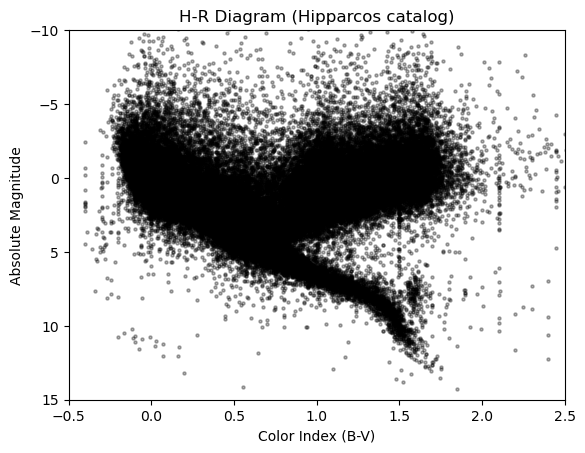

In [166]:
plt.scatter(df_clean['B-V'], df_clean['M_V'], s=5, alpha=0.3, c='k')

plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)

plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram (Hipparcos catalog)')

### 6.6 Highlight Luminosity Classes
Great! Finally, we want to difference between our three main luminosity classes:
* Main Sequence (V), aka what our sun is
* Giants (III)
* Supergiants(I)

Run the cell below.

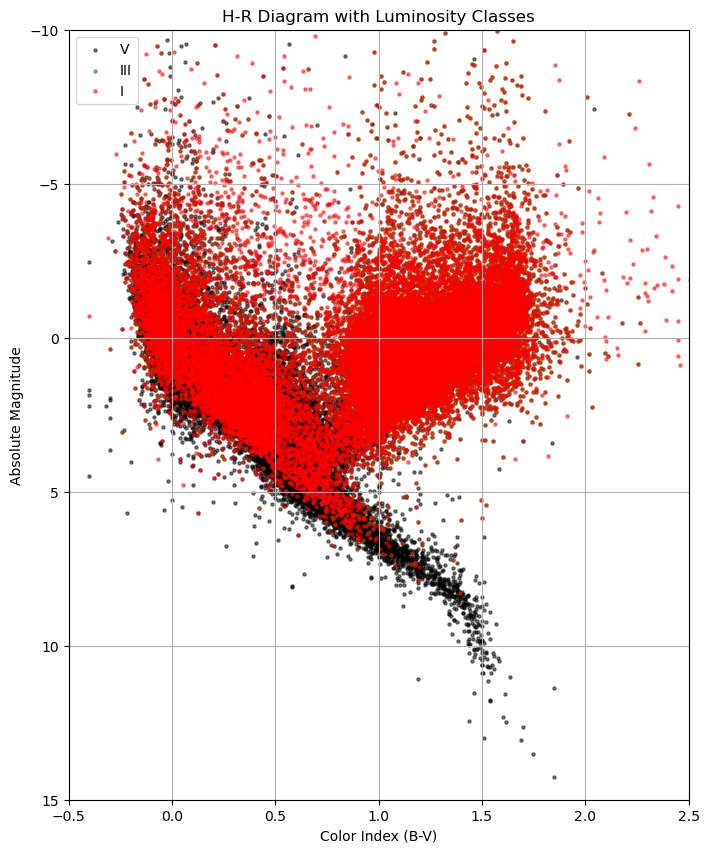

In [168]:
def plot_luminosity_class(df, label, color):
    mask = df['SpType'].str.contains(label, na=False)
    plt.scatter(df[mask]['B-V'], df[mask]['M_V'], s=5, label=label, c=color, alpha=0.5)

plt.figure(figsize=(8,10))
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)
plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram with Luminosity Classes')

plot_luminosity_class(df_clean, 'V', 'black')  # Main Sequence
plot_luminosity_class(df_clean, 'III', 'green')  # Giants
plot_luminosity_class(df_clean, 'I', 'red')  # Supergiants

plt.legend()
plt.show()

With the example above, now plot the following types **WITH** and then **WITHOUT** the ones above:
* Subdwarfs (VI)
* White dwarfs (VII)
* Subgiants (IV)
* Bright giants (II)

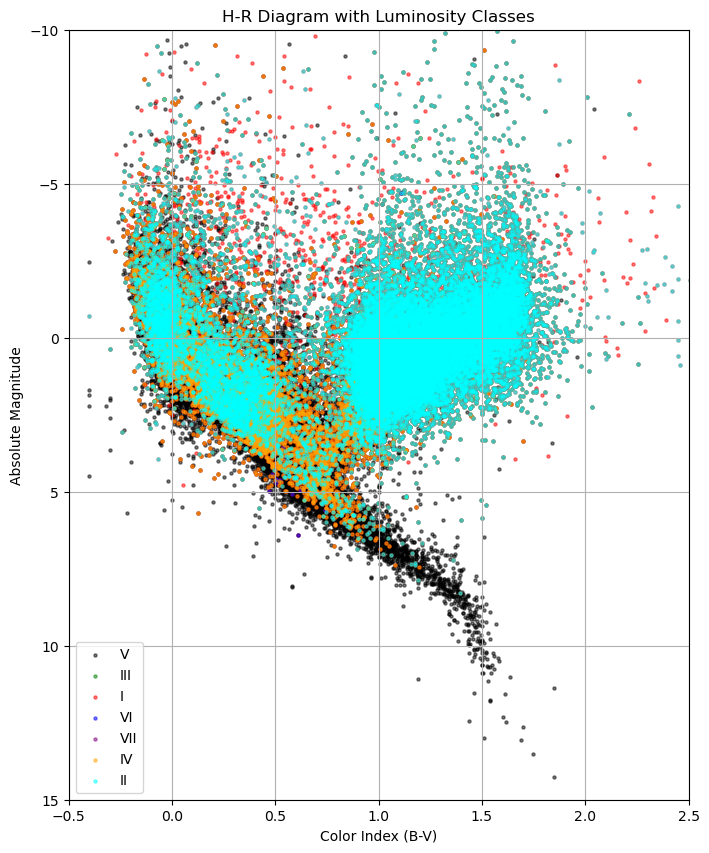

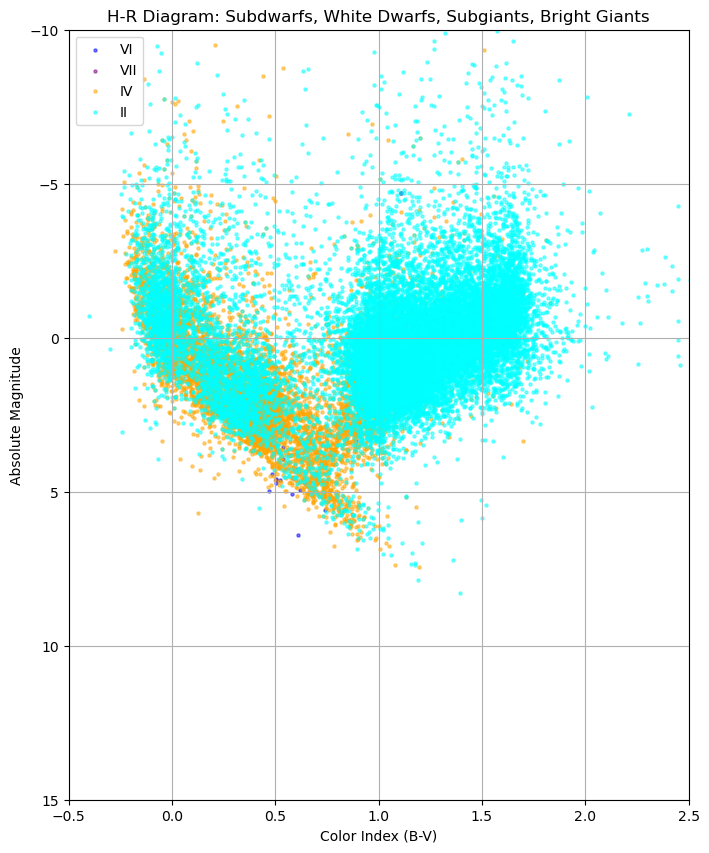

In [177]:
def plot_luminosity_class(df, label, color):
    mask = df['SpType'].str.contains(label, na=False)
    plt.scatter(df[mask]['B-V'], df[mask]['M_V'], s=5, label=label, c=color, alpha=0.5)

plt.figure(figsize=(8,10))
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)
plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram with Luminosity Classes')

plot_luminosity_class(df_clean, 'V', 'black')  # Main Sequence
plot_luminosity_class(df_clean, 'III', 'green')  # Giants
plot_luminosity_class(df_clean, 'I', 'red')  # Supergiants
plot_luminosity_class(df_clean, 'VI', 'blue')
plot_luminosity_class(df_clean, 'VII', 'purple')
plot_luminosity_class(df_clean, 'IV', 'orange')
plot_luminosity_class(df_clean, 'II', 'cyan') 

plt.legend()
plt.show()



plt.figure(figsize=(8,10))
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(15, -10)
plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram: Subdwarfs, White Dwarfs, Subgiants, Bright Giants')

# Only plotting new types
plot_luminosity_class(df_clean, 'VI', 'blue')
plot_luminosity_class(df_clean, 'VII', 'purple')
plot_luminosity_class(df_clean, 'IV', 'orange')
plot_luminosity_class(df_clean, 'II', 'cyan')

plt.legend()
plt.show()

Submit your FITS file and this notebook to Gradescope!